In [ ]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as mpl

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [ ]:
from google import colab
colab.drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/portfolio/data3/user_data.csv', index_col = 0)

In [ ]:
weekday = [dt for dt in data['ACT_DATE'].drop_duplicates().tolist() if date(int(dt[0:4]), int(dt[5:7]), int(dt[8:10])).weekday() <5]

In [ ]:
weekday_data = data[data['ACT_DATE'].isin(weekday)].copy(deep=True)

In [ ]:
weekday_data

,ACT_DATE,INTEREST_FIELD
USER_SEQ,,
2,2021-11-15,Event
3,2021-11-15,Event
4,2021-11-15,Coummunity
5,2021-11-15,Portfolio
6,2021-11-15,Event
...,...,...
7,2021-11-26,Coummunity
8,2021-11-26,Coummunity
9,2021-11-26,Event


In [ ]:
weekday_data['CohortGroup'] = weekday_data.groupby(level=0)['ACT_DATE'].min()
weekday_data.reset_index(inplace=True)
weekday_data.head()

,USER_SEQ,ACT_DATE,INTEREST_FIELD,CohortGroup
0,2,2021-11-15,Event,2021-11-15
1,3,2021-11-15,Event,2021-11-15
2,4,2021-11-15,Coummunity,2021-11-15
3,5,2021-11-15,Portfolio,2021-11-15
4,6,2021-11-15,Event,2021-11-15


In [ ]:
grouped = weekday_data.groupby(['INTEREST_FIELD', 'ACT_DATE'])

In [ ]:
cohorts = grouped.agg({'USER_SEQ': pd.Series.nunique})

In [ ]:
def cohort_period(data):
  data['CohortPeriod'] = np.arange(len(data)) + 1
  return data

In [ ]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [ ]:
cohorts.rename(columns={'USER_SEQ': 'TotalUsers',
                        }, inplace=True)
cohorts.head()

TotalUsers  CohortPeriod
INTEREST_FIELD ACT_DATE                            
Coummunity     2021-11-15         100             1
               2021-11-16          88             2
               2021-11-17          79             3
               2021-11-18          65             4
               2021-11-19          55             5

In [ ]:
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.head()

INTEREST_FIELD
Coummunity    100
Event         100
Portfolio      66
Name: TotalUsers, dtype: int64

In [ ]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

INTEREST_FIELD,Coummunity,Event,Portfolio
ACT_DATE,,,
2021-11-15,1.00,1.00,1.000000
2021-11-16,0.88,0.87,0.939394
2021-11-17,0.79,0.80,0.803030
2021-11-18,0.65,0.65,0.863636
2021-11-19,0.55,0.55,0.696970
2021-11-22,0.50,0.50,0.621212
2021-11-23,0.45,0.45,0.590909
2021-11-24,0.40,0.40,0.439394
2021-11-25,0.38,0.38,0.530303


In [ ]:
user_retention

INTEREST_FIELD,Coummunity,Event,Portfolio
ACT_DATE,,,
2021-11-15,1.00,1.00,1.000000
2021-11-16,0.88,0.87,0.939394
2021-11-17,0.79,0.80,0.803030
2021-11-18,0.65,0.65,0.863636
2021-11-19,0.55,0.55,0.696970
2021-11-22,0.50,0.50,0.621212
2021-11-23,0.45,0.45,0.590909
2021-11-24,0.40,0.40,0.439394
2021-11-25,0.38,0.38,0.530303


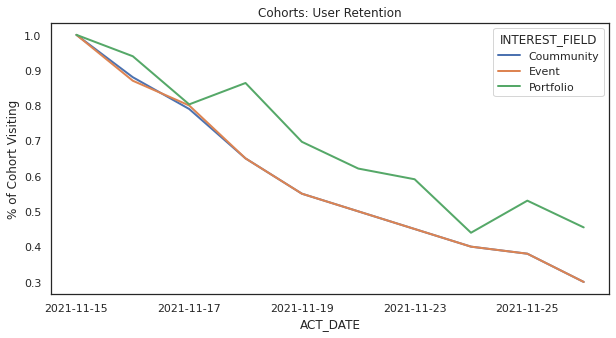

In [ ]:
user_retention[['Coummunity', 'Event', 'Portfolio']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylabel('% of Cohort Visiting');

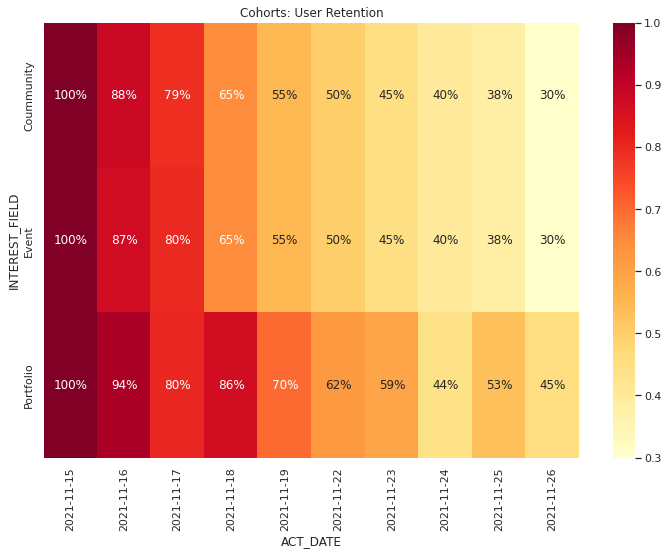

In [ ]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, cmap="YlOrRd", fmt='.0%');

In [ ]:
community_data = weekday_data[weekday_data['INTEREST_FIELD']=='Coummunity'].copy(deep=True)
portfolio_data = weekday_data[weekday_data['INTEREST_FIELD']=='Portfolio'].copy(deep=True)
event_data = weekday_data[weekday_data['INTEREST_FIELD']=='Event'].copy(deep=True)

In [ ]:
print(len(commuinty_data))
print(len(portfolio_data))
print(len(event_data))

1929
1983
448


In [ ]:
grouped = weekday_data.groupby(['INTEREST_FIELD', 'ACT_DATE'])

In [ ]:
grouped

In [ ]:
cohorts = grouped.agg({'USER_SEQ': pd.Series.nunique})

In [ ]:
cohorts.rename(columns={'USER_SEQ': 'TOTAL_USERS'}, inplace=True)

In [ ]:
cohorts.head()

index    ACT_DATE  TOTAL_USERS
INTEREST_FIELD cohort_period                                
Coummunity     1                  0  2021-06-07           30
               2                  1  2021-06-08           40
               3                  2  2021-06-09           50
               4                  3  2021-06-10           60
               5                  4  2021-06-11           65

In [ ]:
def cohort_period(data):
  data['COHORT_PERIOD'] = np.arange(len(data)) + 1
  return data

In [ ]:
cohorts = cohorts.groupby(level=0).apply(cohort_period)

In [ ]:
cohorts.reset_index(inplace=True)

In [ ]:
cohorts.set_index(['INTEREST_FIELD','COHORT_PERIOD'], inplace=True)

In [ ]:
cohorts.drop(['index'], axis=1)

cohort_period    ACT_DATE  TOTAL_USERS
INTEREST_FIELD COHORT_PERIOD                                        
Coummunity     1                          1  2021-06-07           30
               2                          2  2021-06-08           40
               3                          3  2021-06-09           50
               4                          4  2021-06-10           60
               5                          5  2021-06-11           65
               6                          6  2021-06-14           64
               7                          7  2021-06-15           75
               8                          8  2021-06-16           68
               9                          9  2021-06-17           72
               10                        10  2021-06-18           77
Event          1                          1  2021-06-07           29
               2                          2  2021-06-08           33
               3                          3  2021-06-09           41
               4                          4  2021-06-10           35
               5                          5  2021-06-11           27
               6                          6  2021-06-14           26
               7                          7  2021-06-15           24
               8                          8  2021-06-16           30
               9                          9  2021-06-17           30
               10                        10  2021-06-18           21
Portfolio      1                          1  2021-06-07           30
               2                          2  2021-06-08           40
               3                          3  2021-06-09           50
               4                          4  2021-06-10           59
               5                          5  2021-06-11           67
               6                          6  2021-06-14           71
               7                          7  2021-06-15           73
               8                          8  2021-06-16           78
               9                          9  2021-06-17           78
               10                        10  2021-06-18           79

In [ ]:
cohort_group_size = cohorts['TOTAL_USERS'].groupby(level=0).first()
cohort_group_size.head()

INTEREST_FIELD
Coummunity    30
Event         29
Portfolio     30
Name: TOTAL_USERS, dtype: int64

In [ ]:
user_retention = cohorts['TOTAL_USERS'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

INTEREST_FIELD,Coummunity,Event,Portfolio
COHORT_PERIOD,,,
1,1.000000,1.000000,1.000000
2,1.333333,1.137931,1.333333
3,1.666667,1.413793,1.666667
4,2.000000,1.206897,1.966667
5,2.166667,0.931034,2.233333
6,2.133333,0.896552,2.366667
7,2.500000,0.827586,2.433333
8,2.266667,1.034483,2.600000
9,2.400000,1.034483,2.600000


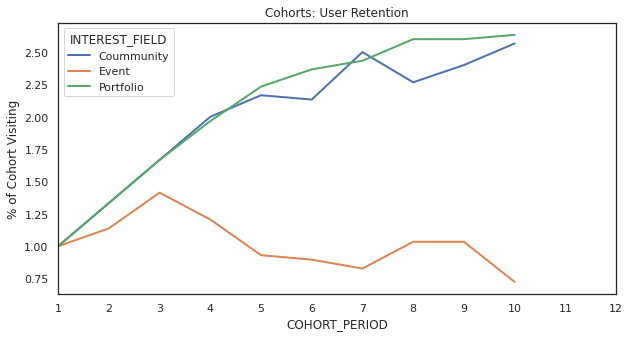

In [ ]:
user_retention[['Coummunity', 'Event', 'Portfolio']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1, 12.1, 1))
plt.xlim(1, 12)
plt.ylabel('% of Cohort Visiting');

In [ ]:
cohorts.to_csv("/content/drive/MyDrive/portfolio/data/cohort_period.csv", index=True)